# **Deep Learning based Pneumonia disease classifier using chest x-ray Images**


In [4]:
pip install --upgrade --force-reinstall <numpy>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `/opt/conda/bin/python3.7 -m pip install --upgrade --force-reinstall <numpy>'
Note: you may need to restart the kernel to use updated packages.


**Installing required packages**

In [1]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.3/458.3 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 384.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 75.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 87.3 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=e4dd8a88a7d7db53240a38e2b1362c43e358ade789d242a32411df6fc5434339
  Stored in directory: /root/.cache/pip/wheels/51/40/ff/2ba7d5d0dee868c4dddb5f9e7389c7ba8afd841a75ce58a576
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=0dd7cf634edb05ac1da577663b5410f832f91c743962ce703a9065f4b47e4c94
  Stored in directory: /root/.ca

**Importing required libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [2]:
#assigning directory
directory=pathlib.Path("/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)")

In [3]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpeg"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [4]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpeg')))
#print(list(directory.glob('/*.jpg')))
image_count

4580

In [5]:
#creating dictionary of flower species
flower_images_dict={
    "Viral":list(directory.glob('Viral/*.jpeg')),
    "Bacterial":list(directory.glob('Bacterial/*.jpeg')),
    "Normal":list(directory.glob('Normal/*.jpeg'))
    
}

In [6]:
flower_images_dict

{'Viral': [PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1180_virus_2010.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1676_virus_2892.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1230_virus_2081.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1513_virus_2632.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person124_virus_238.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person746_virus_1369.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person466_virus_960.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-p

In [7]:
#Different species list
keys=["Viral","Bacterial","Normal"]

In [8]:
#resizing and creating labels using computer vision
count = 0
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        count=count+1
        print(count)
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
1
completed
2
completed
3
completed
4
completed
5
completed
6
completed
7
completed
8
completed
9
completed
10
completed
11
completed
12
completed
13
completed
14
completed
15
completed
16
completed
17
completed
18
completed
19
completed
20
completed
21
completed
22
completed
23
completed
24
completed
25
completed
26
completed
27
completed
28
completed
29
completed
30
completed
31
completed
32
completed
33
completed
34
completed
35
completed
36
completed
37
completed
38
completed
39
completed
40
completed
41
completed
42
completed
43
completed
44
completed
45
completed
46
completed
47
completed
48
completed
49
completed
50
completed
51
completed
52
completed
53
completed
54
completed
55
completed
56
completed
57
completed
58
completed
59
completed
60
completed
61
completed
62
completed
63
completed
64
completed
65
completed
66
completed
67
completed
68
completed
69
completed
70
completed
71
completed
72
completed
73
completed
74
completed
75
completed
76
completed
77
complete

{'Viral': [PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1180_virus_2010.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1676_virus_2892.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1230_virus_2081.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person1513_virus_2632.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person124_virus_238.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person746_virus_1369.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia-classification/Chest_X-ray_(Pneumonia)/Viral/person466_virus_960.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-p

In [9]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [10]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

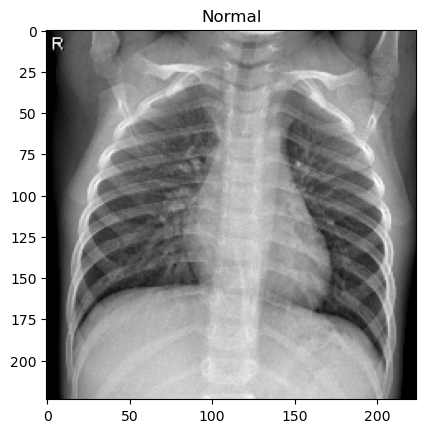

In [14]:
print_image(x_train[37],y_train[37])

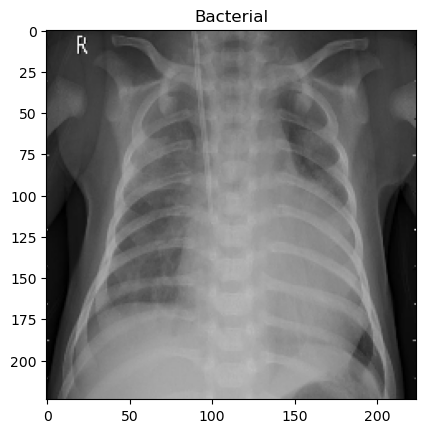

In [15]:
print_image(x_train[10],y_train[10])

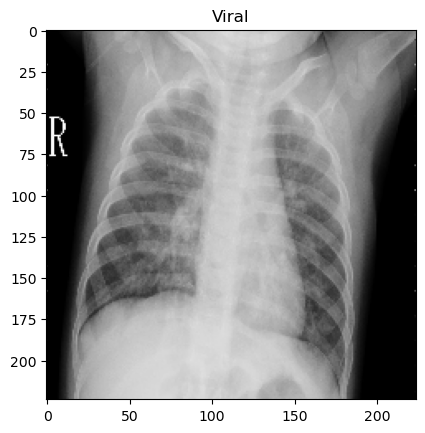

In [16]:
print_image(x_train[15],y_train[15])

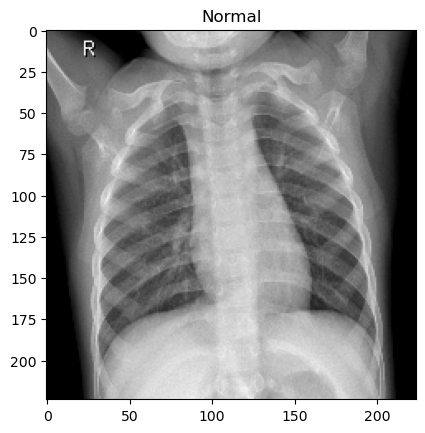

In [17]:
print_image(x_test[6],y_test[6])

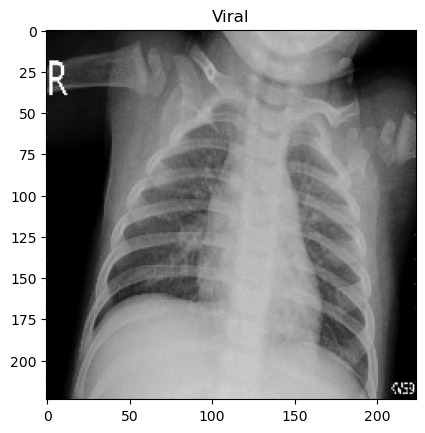

In [18]:
print_image(x_test[19],y_test[19])

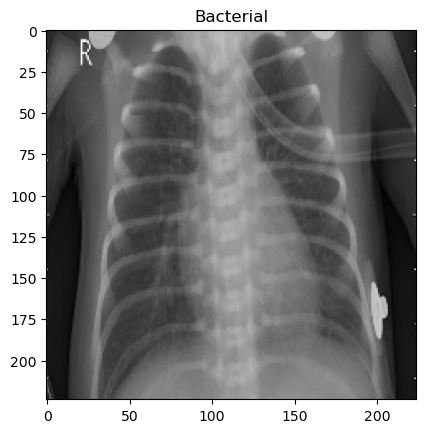

In [19]:
print_image(x_test[28],y_test[28])

In [11]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [12]:
x_train_scaled.shape

(3435, 224, 224, 3)

In [13]:
y_train=np.array(y_train)
y_train.shape

(3435,)

In [14]:
x_test_scaled.shape

(1145, 224, 224, 3)

In [15]:
y_test=np.array(y_test)
y_test.shape

(1145,)

**Callbacks for stopping when the required accuracy is achieved**

In [16]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

# **6. CNN Model with Data Augumentation layer and more dense layers**

# **6.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [26]:
model6_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model6_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [27]:
compare6_1 = model6_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 98ms/step - loss: 1.0049 - accuracy: 0.5642
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 0.6249 - accuracy: 0.7412
Epoch 3/100
108/108 [==============================] - 10s 91ms/step - loss: 0.5731 - accuracy: 0.7645
Epoch 4/100
108/108 [==============================] - 11s 98ms/step - loss: 0.5360 - accuracy: 0.7831
Epoch 5/100
108/108 [==============================] - 10s 90ms/step - loss: 0.4972 - accuracy: 0.8000
Epoch 6/100
108/108 [==============================] - 10s 91ms/step - loss: 0.4754 - accuracy: 0.8154
Epoch 7/100
108/108 [==============================] - 10s 96ms/step - loss: 0.4671 - accuracy: 0.8079
Epoch 8/100
108/108 [==============================] - 10s 91ms/step - loss: 0.4678 - accuracy: 0.8079
Epoch 9/100
108/108 [==============================] - 10s 90ms/step - loss: 0.4545 - accuracy: 0.8076
Epoch 10/100
108/108 [==============================] - 10s 96ms/step - l

In [28]:
model6_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 22ms/step - loss: 0.7929 - accuracy: 0.8410


[0.7929086685180664, 0.8410480618476868]

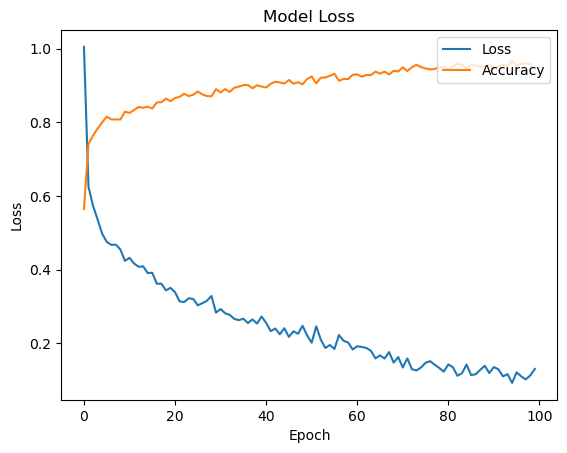

In [29]:
# Plot training & validation loss values
plt.plot(compare6_1.history['loss'])
plt.plot(compare6_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [17]:
model6_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model6_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare6_2 = model6_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 20s 86ms/step - loss: 1.7652 - accuracy: 0.4684
Epoch 2/100
108/108 [==============================] - 9s 81ms/step - loss: 0.8810 - accuracy: 0.6166
Epoch 3/100
108/108 [==============================] - 9s 87ms/step - loss: 0.7413 - accuracy: 0.6812
Epoch 4/100
108/108 [==============================] - 9s 84ms/step - loss: 0.6654 - accuracy: 0.7226
Epoch 5/100
108/108 [==============================] - 9s 84ms/step - loss: 0.6357 - accuracy: 0.7304
Epoch 6/100
108/108 [==============================] - 9s 88ms/step - loss: 0.5907 - accuracy: 0.7523
Epoch 7/100
108/108 [==============================] - 9s 83ms/step - loss: 0.6155 - accuracy: 0.7470
Epoch 8/100
108/108 [==============================] - 9s 82ms/step - loss: 0.5783 - accuracy: 0.7569
Epoch 9/100
108/108 [==============================] - 9s 82ms/step - loss: 0.5561 - accuracy: 0.7750
Epoch 10/100
108/108 [==============================] - 10s 89ms/step - loss: 0.5

In [19]:
model6_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.6205 - accuracy: 0.8376


[0.6204789280891418, 0.8375545740127563]

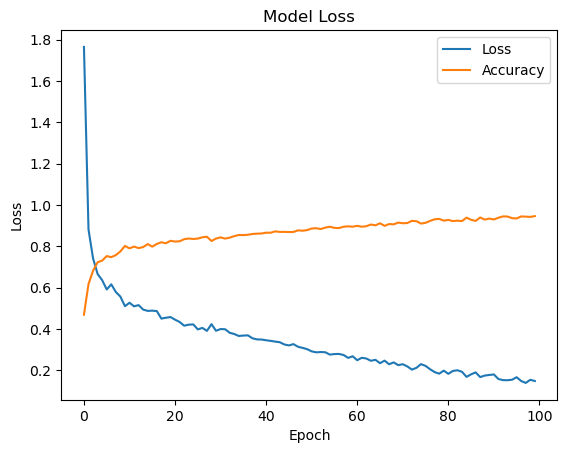

In [20]:
# Plot training & validation loss values
plt.plot(compare6_2.history['loss'])
plt.plot(compare6_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [17]:
model6_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model6_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare6_3 = model6_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 90ms/step - loss: 1.6516 - accuracy: 0.4341
Epoch 2/100
108/108 [==============================] - 9s 82ms/step - loss: 0.8390 - accuracy: 0.6361
Epoch 3/100
108/108 [==============================] - 9s 80ms/step - loss: 0.6818 - accuracy: 0.7080
Epoch 4/100
108/108 [==============================] - 9s 87ms/step - loss: 0.6082 - accuracy: 0.7406
Epoch 5/100
108/108 [==============================] - 9s 83ms/step - loss: 0.5947 - accuracy: 0.7517
Epoch 6/100
108/108 [==============================] - 9s 82ms/step - loss: 0.5551 - accuracy: 0.7674
Epoch 7/100
108/108 [==============================] - 9s 83ms/step - loss: 0.5500 - accuracy: 0.7694
Epoch 8/100
108/108 [==============================] - 9s 84ms/step - loss: 0.5312 - accuracy: 0.7805
Epoch 9/100
108/108 [==============================] - 9s 83ms/step - loss: 0.4936 - accuracy: 0.7884
Epoch 10/100
108/108 [==============================] - 9s 83ms/step - loss: 0.47

In [19]:
model6_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.8321 - accuracy: 0.8323


[0.832115888595581, 0.8323144316673279]

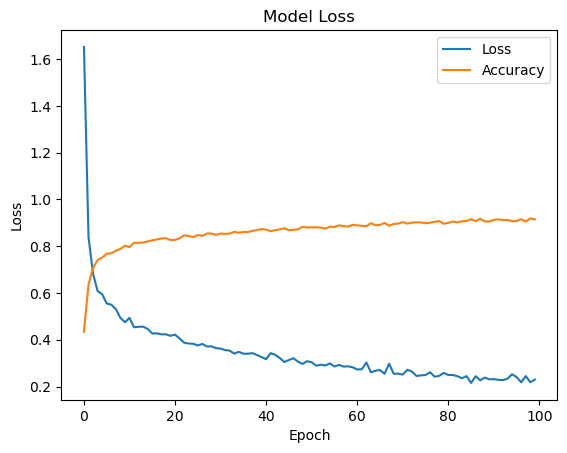

In [20]:
# Plot training & validation loss values
plt.plot(compare6_3.history['loss'])
plt.plot(compare6_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [17]:
model6_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model6_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare6_4 = model6_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 20s 87ms/step - loss: 1.0827 - accuracy: 0.4151
Epoch 2/100
108/108 [==============================] - 9s 83ms/step - loss: 0.9546 - accuracy: 0.5290
Epoch 3/100
108/108 [==============================] - 9s 85ms/step - loss: 0.8310 - accuracy: 0.6064
Epoch 4/100
108/108 [==============================] - 9s 82ms/step - loss: 0.7728 - accuracy: 0.6574
Epoch 5/100
108/108 [==============================] - 9s 81ms/step - loss: 0.7292 - accuracy: 0.6830
Epoch 6/100
108/108 [==============================] - 9s 86ms/step - loss: 0.7053 - accuracy: 0.6885
Epoch 7/100
108/108 [==============================] - 9s 82ms/step - loss: 0.6897 - accuracy: 0.7010
Epoch 8/100
108/108 [==============================] - 9s 82ms/step - loss: 0.6578 - accuracy: 0.7127
Epoch 9/100
108/108 [==============================] - 9s 83ms/step - loss: 0.6632 - accuracy: 0.7121
Epoch 10/100
108/108 [==============================] - 10s 88ms/step - loss: 0.6

In [19]:
model6_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 18ms/step - loss: 0.4410 - accuracy: 0.8603


[0.4410426914691925, 0.8602620363235474]

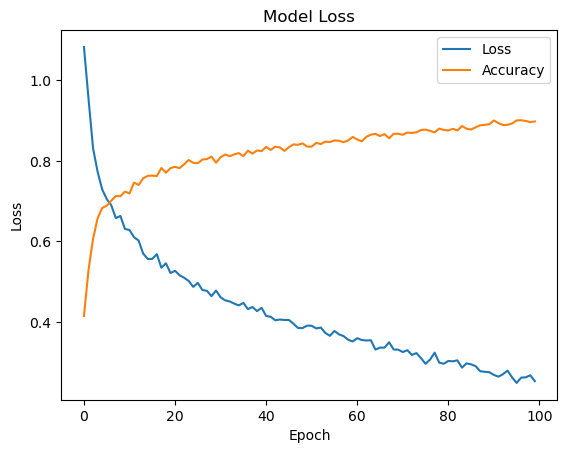

In [20]:
# Plot training & validation loss values
plt.plot(compare6_4.history['loss'])
plt.plot(compare6_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [17]:
model6_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model6_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare6_5 = model6_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 26s 89ms/step - loss: 1.0682 - accuracy: 0.4393
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 1.0074 - accuracy: 0.5208
Epoch 3/100
108/108 [==============================] - 9s 84ms/step - loss: 0.9494 - accuracy: 0.5715
Epoch 4/100
108/108 [==============================] - 9s 86ms/step - loss: 0.9058 - accuracy: 0.6061
Epoch 5/100
108/108 [==============================] - 9s 87ms/step - loss: 0.8709 - accuracy: 0.6277
Epoch 6/100
108/108 [==============================] - 10s 91ms/step - loss: 0.8416 - accuracy: 0.6344
Epoch 7/100
108/108 [==============================] - 9s 86ms/step - loss: 0.8193 - accuracy: 0.6509
Epoch 8/100
108/108 [==============================] - 9s 86ms/step - loss: 0.8024 - accuracy: 0.6632
Epoch 9/100
108/108 [==============================] - 10s 90ms/step - loss: 0.7876 - accuracy: 0.6722
Epoch 10/100
108/108 [==============================] - 9s 84ms/step - loss: 0

In [19]:
model6_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 19ms/step - loss: 0.5320 - accuracy: 0.7668


[0.5319980978965759, 0.7668122053146362]

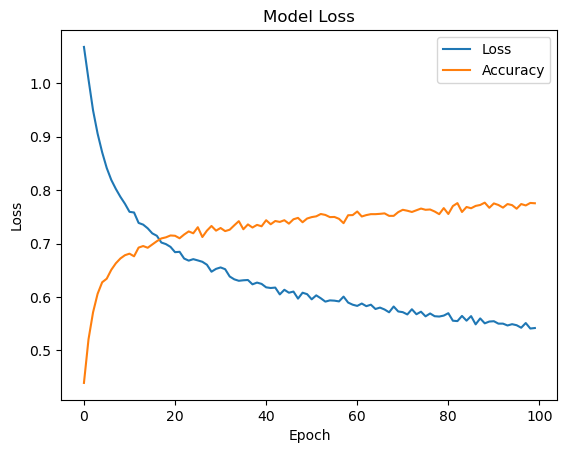

In [20]:
# Plot training & validation loss values
plt.plot(compare6_5.history['loss'])
plt.plot(compare6_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **7. CNN Model that uses Filters in all the Layers**

# **7.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [17]:
myCNN7_1=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(3,activation="softmax")    
])
myCNN7_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare7_1 = myCNN7_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 19s 61ms/step - loss: 0.7233 - accuracy: 0.7217
Epoch 2/100
108/108 [==============================] - 6s 58ms/step - loss: 0.3995 - accuracy: 0.8457
Epoch 3/100
108/108 [==============================] - 6s 58ms/step - loss: 0.3337 - accuracy: 0.8766
Epoch 4/100
108/108 [==============================] - 6s 58ms/step - loss: 0.2815 - accuracy: 0.8911
Epoch 5/100
108/108 [==============================] - 6s 59ms/step - loss: 0.2154 - accuracy: 0.9159
Epoch 6/100
108/108 [==============================] - 6s 58ms/step - loss: 0.1460 - accuracy: 0.9461
Epoch 7/100
108/108 [==============================] - 6s 58ms/step - loss: 0.1231 - accuracy: 0.9525
Epoch 8/100
108/108 [==============================] - 6s 58ms/step - loss: 0.0668 - accuracy: 0.9726
Epoch 9/100
107/108 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9921call

Reached 99.00% accuracy, so stopping training!!
108/108 [========================

In [19]:
myCNN7_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 33ms/step - loss: 0.8243 - accuracy: 0.8428


[0.8242701888084412, 0.8427947759628296]

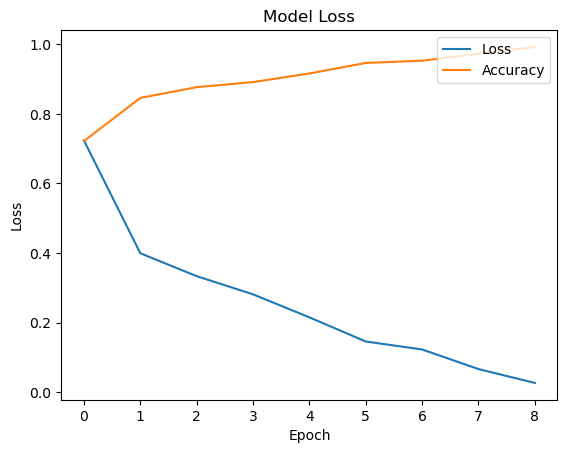

In [20]:
# Plot training & validation loss values
plt.plot(compare7_1.history['loss'])
plt.plot(compare7_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **7.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [17]:
myCNN7_2=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(3,activation="softmax")    
])
myCNN7_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare7_2 = myCNN7_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 19s 62ms/step - loss: 0.8276 - accuracy: 0.7328
Epoch 2/100
108/108 [==============================] - 6s 59ms/step - loss: 0.3874 - accuracy: 0.8504
Epoch 3/100
108/108 [==============================] - 6s 58ms/step - loss: 0.3489 - accuracy: 0.8675
Epoch 4/100
108/108 [==============================] - 6s 59ms/step - loss: 0.2890 - accuracy: 0.8891
Epoch 5/100
108/108 [==============================] - 6s 60ms/step - loss: 0.2460 - accuracy: 0.9054
Epoch 6/100
108/108 [==============================] - 6s 59ms/step - loss: 0.2093 - accuracy: 0.9237
Epoch 7/100
108/108 [==============================] - 6s 59ms/step - loss: 0.1706 - accuracy: 0.9365
Epoch 8/100
108/108 [==============================] - 6s 58ms/step - loss: 0.1317 - accuracy: 0.9517
Epoch 9/100
108/108 [==============================] - 6s 59ms/step - loss: 0.0952 - accuracy: 0.9665
Epoch 10/100
108/108 [==============================] - 6s 60ms/step - loss: 0.07

In [19]:
myCNN7_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 32ms/step - loss: 0.6839 - accuracy: 0.8157


[0.6838726997375488, 0.8157204985618591]

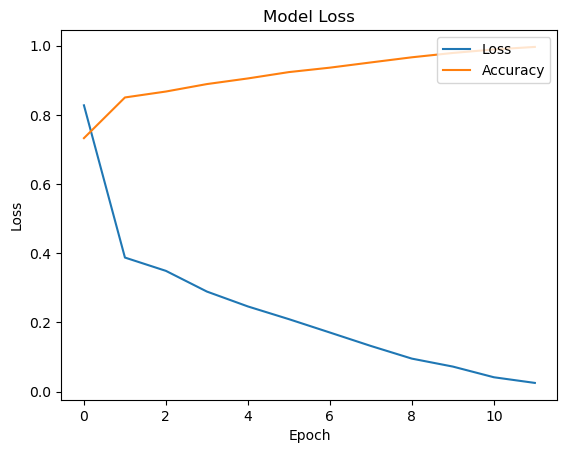

In [20]:
# Plot training & validation loss values
plt.plot(compare7_2.history['loss'])
plt.plot(compare7_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **7.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [18]:
myCNN7_3=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(3,activation="softmax")    
])
myCNN7_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare7_3 = myCNN7_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 22s 61ms/step - loss: 0.9984 - accuracy: 0.7220
Epoch 2/100
108/108 [==============================] - 6s 57ms/step - loss: 0.4270 - accuracy: 0.8355
Epoch 3/100
108/108 [==============================] - 6s 58ms/step - loss: 0.3460 - accuracy: 0.8722
Epoch 4/100
108/108 [==============================] - 6s 58ms/step - loss: 0.2849 - accuracy: 0.8905
Epoch 5/100
108/108 [==============================] - 6s 58ms/step - loss: 0.2518 - accuracy: 0.9095
Epoch 6/100
108/108 [==============================] - 6s 57ms/step - loss: 0.1746 - accuracy: 0.9333
Epoch 7/100
108/108 [==============================] - 6s 58ms/step - loss: 0.1028 - accuracy: 0.9622
Epoch 8/100
108/108 [==============================] - 6s 58ms/step - loss: 0.0562 - accuracy: 0.9790
Epoch 9/100
108/108 [==============================] - 6s 59ms/step - loss: 0.0376 - accuracy: 0.9892
Epoch 10/100
107/108 [============================>.] - ETA: 0s - loss: 0.0285 - 

In [20]:
myCNN7_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 33ms/step - loss: 0.9877 - accuracy: 0.8541


[0.9876909255981445, 0.8541484475135803]

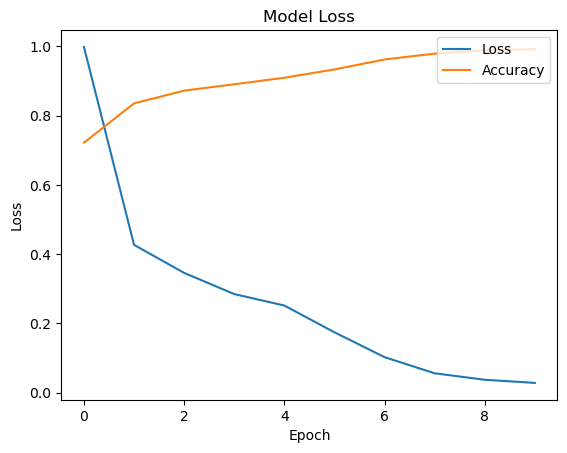

In [21]:
# Plot training & validation loss values
plt.plot(compare7_3.history['loss'])
plt.plot(compare7_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **7.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [17]:
myCNN7_4=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(3,activation="softmax")    
])
myCNN7_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare7_4 = myCNN7_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 61ms/step - loss: 0.8013 - accuracy: 0.6422
Epoch 2/100
108/108 [==============================] - 6s 57ms/step - loss: 0.5645 - accuracy: 0.7540
Epoch 3/100
108/108 [==============================] - 6s 57ms/step - loss: 0.4879 - accuracy: 0.7945
Epoch 4/100
108/108 [==============================] - 6s 57ms/step - loss: 0.4428 - accuracy: 0.8192
Epoch 5/100
108/108 [==============================] - 6s 58ms/step - loss: 0.4011 - accuracy: 0.8428
Epoch 6/100
108/108 [==============================] - 6s 57ms/step - loss: 0.3722 - accuracy: 0.8521
Epoch 7/100
108/108 [==============================] - 6s 57ms/step - loss: 0.3614 - accuracy: 0.8626
Epoch 8/100
108/108 [==============================] - 6s 57ms/step - loss: 0.3384 - accuracy: 0.8722
Epoch 9/100
108/108 [==============================] - 6s 58ms/step - loss: 0.3293 - accuracy: 0.8731
Epoch 10/100
108/108 [==============================] - 6s 58ms/step - loss: 0.30

In [19]:
myCNN7_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 33ms/step - loss: 0.6425 - accuracy: 0.8210


[0.6424845457077026, 0.8209607005119324]

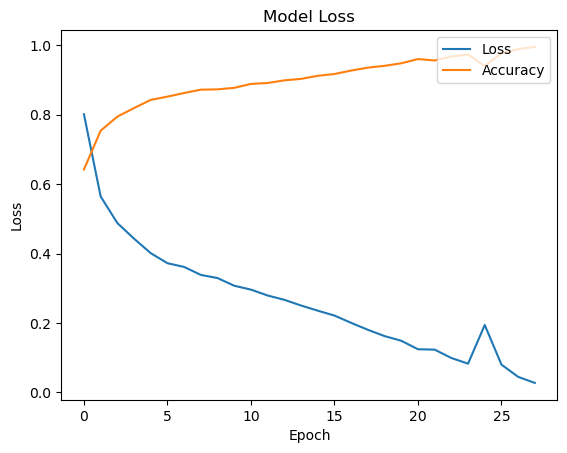

In [20]:
# Plot training & validation loss values
plt.plot(compare7_4.history['loss'])
plt.plot(compare7_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **7.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [17]:
myCNN7_5=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(3,activation="softmax")    
])
myCNN7_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
compare7_5 = myCNN7_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 16s 62ms/step - loss: 1.0236 - accuracy: 0.5325
Epoch 2/100
108/108 [==============================] - 6s 58ms/step - loss: 0.9076 - accuracy: 0.6789
Epoch 3/100
108/108 [==============================] - 6s 60ms/step - loss: 0.8127 - accuracy: 0.7205
Epoch 4/100
108/108 [==============================] - 6s 58ms/step - loss: 0.7368 - accuracy: 0.7435
Epoch 5/100
108/108 [==============================] - 6s 58ms/step - loss: 0.6768 - accuracy: 0.7622
Epoch 6/100
108/108 [==============================] - 6s 59ms/step - loss: 0.6334 - accuracy: 0.7726
Epoch 7/100
108/108 [==============================] - 6s 58ms/step - loss: 0.5961 - accuracy: 0.7889
Epoch 8/100
108/108 [==============================] - 6s 60ms/step - loss: 0.5693 - accuracy: 0.7956
Epoch 9/100
108/108 [==============================] - 6s 59ms/step - loss: 0.5471 - accuracy: 0.8000
Epoch 10/100
108/108 [==============================] - 6s 59ms/step - loss: 0.52

In [19]:
myCNN7_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 34ms/step - loss: 0.3778 - accuracy: 0.8568


[0.37779951095581055, 0.8567685484886169]

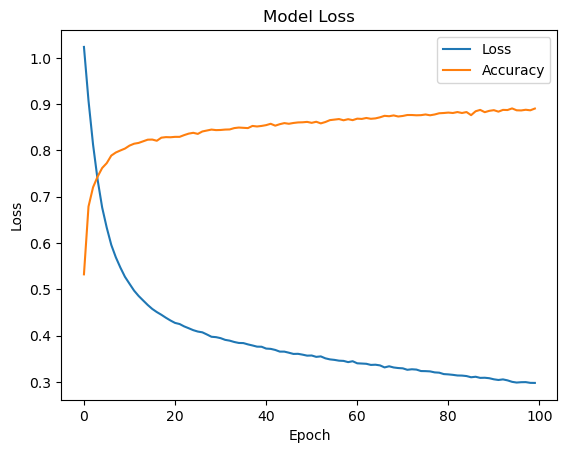

In [20]:
# Plot training & validation loss values
plt.plot(compare7_5.history['loss'])
plt.plot(compare7_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()